# --- Non-linear dataset (swiss roll) -----------------------------------------------------------

## Populate swiss-roll dataset

In [1]:
from sklearn import datasets

In [2]:
X, color = datasets.make_swiss_roll(n_samples=5000, noise=0.0)

In [3]:
Y_labels = ['X', 'Y', 'Z']

## Prepare data (feature scaling)

In [4]:
from sklearn import preprocessing

In [5]:
std_scale = preprocessing.StandardScaler().fit(X)

In [6]:
X_scaled = std_scale.transform(X)

## Apply PCA dimentionality reduction

In [7]:
from sklearn import decomposition

In [8]:
pca = decomposition.PCA(n_components=2)

#### Decompose

In [9]:
pca.fit(X_scaled)

PCA(n_components=2)

#### Examine explained variance

In [10]:
pca.explained_variance_ratio_

array([0.36204517, 0.33366592])

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Eigenvalue')

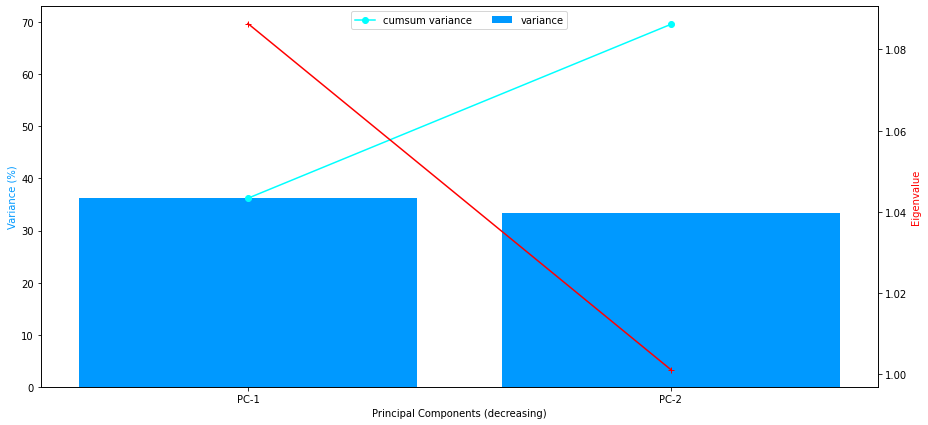

In [12]:
scree = pca.explained_variance_ratio_*100
eigenvalues = pca.explained_variance_
titles = [f"PC-{i+1}" for i in range(pca.n_components)]

fig = plt.figure(figsize=(15,7))
axis_1 = fig.add_subplot(111)
axis_1.bar(titles, scree, label='variance', color='#0099FF')
axis_1.plot(titles, scree.cumsum(),c="cyan",marker='o', label='cumsum variance')
axis_1.set_ylabel(r"Variance (%)", color='#0099FF')
axis_1.set_xlabel(r"Principal Components (decreasing)")
axis_1.legend(loc=9, ncol=2)

axis_2 = axis_1.twinx()
axis_2.plot(titles, eigenvalues,c="red",marker='+', label="eigenvalues")
axis_2.set_ylabel(r"Eigenvalue", color='#FF0000')
#axis_2.legend(loc=5)

#### Project

In [13]:
X_projected = pca.transform(X_scaled)
X_projected.shape

(5000, 2)

## Plot

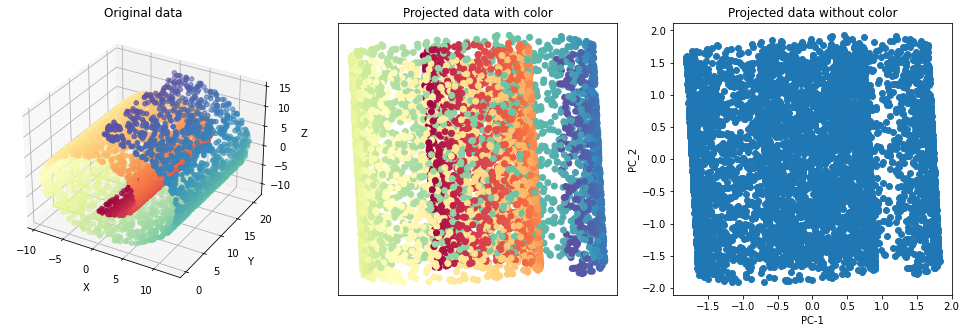

In [14]:
fig = plt.figure(figsize=(17,5))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(132)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title('Projected data with color')

ax = fig.add_subplot(133)
ax.scatter(X_projected[:, 0], X_projected[:, 1])
#plt.xticks([]), plt.yticks([])
plt.title('Projected data without color')
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")

plt.show()

## --- Interpretation -----------------------------------------------------------------------------------------------------

In [15]:
from functions import *

In [16]:
pcs = pca.components_
pcs.shape

(2, 3)

#### Correlation circle (+1 or -1 = perfect representation)

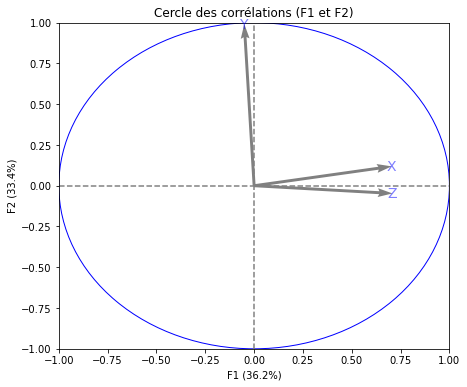

In [17]:
display_circles(pcs, 2, pca, [(0,1)], labels = Y_labels)

#### Correlation 'circle' (+1 or -1 = perfect representation) -- increased visibility

Text(0, 0.5, 'PC-2 (33.37%)')

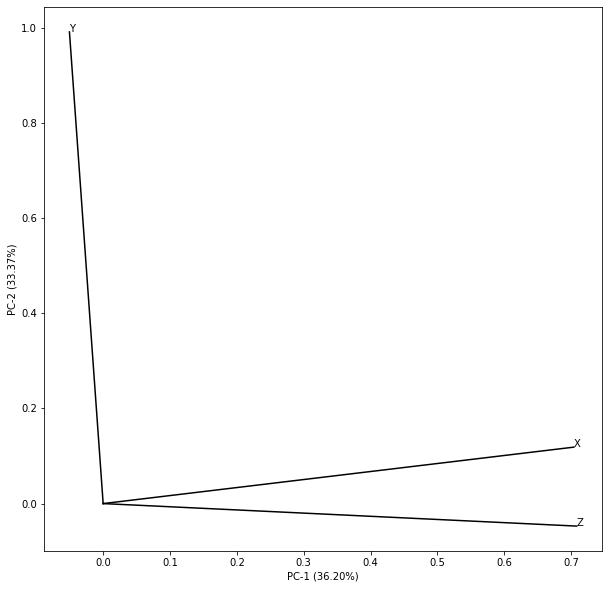

In [18]:
fig = plt.figure(figsize=(10,10))

for i, (x,y) in enumerate(np.transpose(pcs[:2])):
    plt.plot([0,x], [0,y], color='k')
    plt.text(x, y, Y_labels[i])
    
plt.xlabel(f'PC-1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC-2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

#### Principal Components heatmap (PC-1 & PC-2)

In [19]:
comp1_2 = pd.DataFrame(pcs[:2], columns=Y_labels)

<AxesSubplot:>

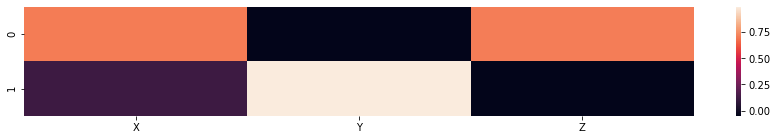

In [20]:
import seaborn as sns
plt.figure(figsize=(15,2))
sns.heatmap(comp1_2)

## --- Notes ----------------------------------------------------------------------------------------------------------------

PCA doesn't works well with non-linearly separable datasets... 

Use k-PCA / Isomap / LLE / t-SNE instead.